In [55]:
## udf
import temporal_functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
from figurefirst import FigureLayout,mpl_functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib.colors import LogNorm
from astropy import stats

from scipy import stats

from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)


from scipy import optimize
from scipy import special

import figurefirst as fifi

### Averaging for 10-second to 10 minute Lag

In [35]:
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/'

dfs = [
    pd.read_hdf(folder_path+'10.20.20_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'7.7.21_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'9.26.21_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'10.29.21_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'10.30.21_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'1.8.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'1.11.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'1.15.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'4.30.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'5.1.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'5.2.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'6.1.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'6.3.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'6.7.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'6.8.22_maskedgpsdata.hdf'),
    pd.read_hdf(folder_path+'6.22.22_maskedgpsdata.hdf')
]

# List of corresponding filenames for saving
filenames = [
    '10.20.20_temporal.hdf',
    '7.7.21_temporal.hdf',
    '9.26.21_temporal.hdf',
    '10.29.21_temporal.hdf',
    '10.30.21_temporal.hdf',
    '1.8.22_temporal.hdf',
    '1.11.22_temporal.hdf',
    '1.15.22_temporal.hdf',
    '4.30.22_temporal.hdf',
    '5.1.22_temporal.hdf',
    '5.2.22_temporal.hdf',
    '6.1.22_temporal.hdf',
    '6.3.22_temporal.hdf',
    '6.7.22_temporal.hdf',
    '6.8.22_temporal.hdf',
    '6.22.22_temporal.hdf'
]

In [60]:
dir='~/DataAnalysis/data/DesertWind/'
df1= pd.read_hdf(dir+"20201020_172919_windy_b_data.hdf")

In [62]:
dt=df1.time_epoch.iloc[1]-df1.time_epoch.iloc[0]

time = []
time.append(0)
for j in range(1,len(df1)):
    time.append(time[j-1]+dt)     

df1['time']=time

In [63]:
df1.time

0             0.000000
1             0.364010
2             0.728020
3             1.092030
4             1.456039
              ...     
220325    80200.471783
220326    80200.835793
220327    80201.199802
220328    80201.563812
220329    80201.927822
Name: time, Length: 220330, dtype: float64

In [75]:
# ax1.axvspan(0, 47839,  alpha=0.4, color='lightsteelblue')
# ax1.axvspan(47839,80201,  alpha=0.4, color='lightgrey')

lws = df1.query('time <= 47839').copy()
hws = df1.query('time >= 47839').copy()

,millis,lat,lon,gps_time,gps_date,wind,gps_date_str,year,month,day,...,S2,D,U,V,W,T,H,AD,MD,time
131423,13174163,40.793552,-119.157318,210819,201020,b'\nS2 03.17 D 221 U 02.08 V 02.40 W 00.1...,201020,2020.0,10.0,20.0,...,3.17,221.0,2.08,2.40,0.10,19.44,79.27,1.042525,142.0,47839.267460
131424,13174263,40.793552,-119.157318,210819,201020,b'\nS2 03.59 D 213 U 01.94 V 03.02 W -00.3...,201020,2020.0,10.0,20.0,...,3.59,213.0,1.94,3.02,-0.33,19.38,79.52,1.042752,142.0,47839.631470
131425,13174363,40.793552,-119.157318,210819,201020,b'\nS2 03.36 D 211 U 01.72 V 02.89 W -00.2...,201020,2020.0,10.0,20.0,...,3.36,211.0,1.72,2.89,-0.23,19.63,78.34,1.041797,142.0,47839.995480
131426,13174463,40.793552,-119.157318,210819,201020,b'\nS2 03.29 D 216 U 01.95 V 02.66 W -00.3...,201020,2020.0,10.0,20.0,...,3.29,216.0,1.95,2.66,-0.31,19.42,79.37,1.042610,142.0,47840.359489
131427,13174563,40.793552,-119.157318,210819,201020,b'\nS2 03.68 D 210 U 01.82 V 03.20 W -00.2...,201020,2020.0,10.0,20.0,...,3.68,210.0,1.82,3.20,-0.26,19.65,78.20,1.041805,142.0,47840.723499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220325,22064319,40.793556,-119.157318,233629,201020,b'\nS2 04.50 D 209 U 02.16 V 03.95 W -00.2...,201020,2020.0,10.0,20.0,...,4.50,209.0,2.16,3.95,-0.20,21.64,44.16,1.036099,143.0,80200.471783
220326,22064419,40.793556,-119.157318,233630,201020,b'\nS2 04.78 D 205 U 02.04 V 04.32 W -00.2...,201020,2020.0,10.0,20.0,...,4.78,205.0,2.04,4.32,-0.24,21.71,43.94,1.035914,143.0,80200.835793
220327,22064519,40.793556,-119.157318,233630,201020,b'\nS2 04.36 D 208 U 02.08 V 03.83 W 00.0...,201020,2020.0,10.0,20.0,...,4.36,208.0,2.08,3.83,0.02,21.68,44.00,1.035977,143.0,80201.199802
220328,22064619,40.793556,-119.157318,233630,201020,b'\nS2 04.57 D 209 U 02.22 V 04.00 W -00.1...,201020,2020.0,10.0,20.0,...,4.57,209.0,2.22,4.00,-0.19,21.66,44.05,1.036067,142.0,80201.563812


In [56]:
# loglags = np.arange(100,6100,100)

# for idx, df in enumerate(dfs):
#     print(filenames[idx])
#     totalrows = np.arange(0, int(len(df)/1000))
#     listoflists_avgd = np.empty((len(totalrows), 0)).tolist()
#     listoflists_avgs = np.empty((len(totalrows), 0)).tolist()
#     listoflists_stdd = np.empty((len(totalrows), 0)).tolist()
#     listoflists_stds = np.empty((len(totalrows), 0)).tolist()

#     for j in totalrows:
#         listoflists_avgd[j], listoflists_avgs[j], listoflists_stdd[j], listoflists_stds[j] = temporal_functions.new_temporal_analysis(df.D_2, df.S2_2, lagarray=loglags, method='forward')

#     # Convert to df
#     df_avgd = pd.DataFrame(listoflists_avgd, columns=loglags)
#     df_avgs = pd.DataFrame(listoflists_avgs, columns=loglags)
#     df_stdd = pd.DataFrame(listoflists_stdd, columns=loglags)
#     df_stds = pd.DataFrame(listoflists_stds, columns=loglags)

#     frames = []
#     for k in df_avgd.index:
#         xtra = {
#             'speed_std': df_stds.iloc[k,:], 
#             'direction_std': df_stdd.iloc[k,:],
#             'speed_avg': df_avgs.iloc[k,:], 
#             'direction_avg': df_avgd.iloc[k,:],
#         }
#         frames.append(pd.DataFrame(xtra))

#     test_ddf = pd.concat(frames)

#     test_ddf.reset_index(inplace=True)
#     test_ddf.rename(columns={'index':'time'}, inplace=True)

#     test_ddf[['environment']] = .001
#     test_ddf[['group']] = 1
#     test_ddf.direction_std = test_ddf.direction_std*180/np.pi
#     test_ddf.time = test_ddf.time*.1 

#     # Save with the corresponding filename
#     test_ddf.to_hdf(folder_path +'by1000/'+ filenames[idx], key='data',mode='w')


### Prepping the temporals

In [15]:
## 10 second
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/LowRes/'
t1=pd.read_hdf(folder_path+'10.20.20_temporal.hdf')
t2=pd.read_hdf(folder_path+'7.7.21_temporal.hdf')
t3=pd.read_hdf(folder_path+'9.26.21_temporal.hdf')
t4=pd.read_hdf(folder_path+'10.29.21_temporal.hdf')
t5=pd.read_hdf(folder_path+'10.30.21_temporal.hdf')
t6=pd.read_hdf(folder_path+'1.8.22_temporal.hdf')
t7=pd.read_hdf(folder_path+'1.11.22_temporal.hdf')
t8=pd.read_hdf(folder_path+'1.15.22_temporal.hdf')
t9=pd.read_hdf(folder_path+'4.30.22_temporal.hdf')
t10=pd.read_hdf(folder_path+'5.1.22_temporal.hdf')
t11=pd.read_hdf(folder_path+'5.2.22_temporal.hdf')
t12=pd.read_hdf(folder_path+'6.1.22_temporal.hdf')
t13=pd.read_hdf(folder_path+'6.3.22_temporal.hdf')
t14=pd.read_hdf(folder_path+'6.7.22_temporal.hdf')
t15=pd.read_hdf(folder_path+'6.8.22_temporal.hdf')
t16=pd.read_hdf(folder_path+'6.22.22_temporal.hdf')

t1_1=pd.read_hdf(folder_path+'hws_temporal.hdf')
t1_2=pd.read_hdf(folder_path+'lws_temporal.hdf')
t_f=pd.read_hdf(folder_path+'forest_temporal.hdf')
t_desert=pd.read_hdf(folder_path+'desert_temporal.hdf')

In [3]:
# print('hws',np.mean(t1_1.direction_std))
# print('lws',np.mean(t1_2.direction_std))
# print('forest',np.mean(t_f.direction_std))
# print('desert',np.mean(t_desert.direction_std))

In [18]:
np.where(t1.time==600)

(array([ 59, 119, 179, 239, 299, 359, 419, 479, 539, 599, 659, 719]),)

In [16]:
t1_1['turb_intensity']=t1_1['speed_std']/t1_1['speed_avg']
t1_2['turb_intensity']=t1_2['speed_std']/t1_2['speed_avg']
t_f['turb_intensity']=t_f['speed_std']/t_f['speed_avg']
t_desert['turb_intensity']=t_desert['speed_std']/t_desert['speed_avg']

print('hws',np.mean(t1_1.turb_intensity))
print('lws',np.mean(t1_2.turb_intensity))
print('desert',np.mean(t_desert.turb_intensity))
print('forest',np.mean(t_f.turb_intensity))

hws 0.13695991439742758
lws 0.36049355928092397
desert 0.26898192445812114
forest 0.542447812723691


In [26]:
alltemp=[t1,t2,t4,t7,t8,t12,t13,t14,t15,t16] ## without urban

# alltemp=[t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16] ## with urban

# Filter each dataframe in the list to include only rows where time == 10
alltemp_new = [df.query('time == 10').copy() for df in alltemp]  # Added .copy() to ensure we're working with a new DataFrame

for df in alltemp_new:
    df.loc[:, 'turb_intensity'] = df['speed_std'] / df['speed_avg']

alltempconcat = pd.concat(alltemp_new)
alltempconcat = alltempconcat.reset_index(drop=True,inplace=False)

# for i in range(len(alltemp_new)):
#     alltemp[i]['turb_intensity']=alltemp[i]['speed_std']/alltemp[i]['speed_avg']
    
# alltempconcat=pd.concat(alltemp)
# alltempconcat=alltempconcat.reset_index(inplace=False)


In [29]:
# desertchunks=pd.concat([t1,t7,t8,t12,t13])
# forestchunks=pd.concat([t2,t4,t14,t15,t16])
# urbanchunks=pd.concat([t3,t5,t6,t9,t10,t11])
# desert=0,6,7,11,12
# forest=1,3,13,14,15
# urban=2,4,5,8,9,10

# desertchunks=desertchunks.reset_index(drop=True)
# forestchunks=forestchunks.reset_index(drop=True)
# urbanchunks=urbanchunks.reset_index(drop=True)

In [32]:
lag_filter=10

t1_1 = pd.read_hdf(folder_path+'hws_temporal.hdf')
t1_1 = t1_1[t1_1['time'] == lag_filter]
t1_1 = t1_1.reset_index(drop=True,inplace=False)

t1_2 = pd.read_hdf(folder_path+'lws_temporal.hdf')
t1_2 = t1_2[t1_2['time'] == lag_filter]
t1_2 = t1_2.reset_index(drop=True,inplace=False)

t_f = pd.read_hdf(folder_path+'forest_temporal.hdf')
t_f = t_f[t_f['time'] == lag_filter]
t_f = t_f.reset_index(drop=True,inplace=False)

t_desert = pd.read_hdf(folder_path+'desert_temporal.hdf')
t_desert = t_desert[t_desert['time'] == lag_filter]
t_desert = t_desert.reset_index(drop=True,inplace=False)

### Plotting the Contour Map using Seaborn KDE

In [ ]:
# Create a JointGrid
g = sns.JointGrid(data=alltempconcat, x='speed_avg', y='direction_std', space=0, height=7, ratio=5)

# Plot the main KDE on the JointGrid
density = sns.kdeplot(x=alltempconcat.speed_avg, y=alltempconcat.direction_std, cmap='bone_r', ax=g.ax_joint, cbar=True,
            norm=LogNorm(),
            shade=True, label='All Data')
# Plot the secondary KDE
# sns.kdeplot(data=alltempconcat, x='speed_avg', y='direction_std', cmap='gray', alpha=0.5, levels=[0.04], shade=False, ax=g.ax_joint)

# # Marginal distributions
# sns.kdeplot(data=alltempconcat['speed_avg'], ax=g.ax_marg_x, legend=False)
# sns.kdeplot(data=alltempconcat['direction_std'], ax=g.ax_marg_y, vertical=True, legend=False)
# sns.distplot(alltempconcat.direction_std, kde=True, ax=g.ax_marg_y, vertical=True)

pos_joint_ax = g.ax_joint.get_position()
pos_marg_x_ax = g.ax_marg_x.get_position()
g.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
g.fig.axes[-1].set_position([.86, pos_joint_ax.y0, .07, pos_joint_ax.height])

# Scatter plots
g.ax_joint.scatter(t1_1.speed_avg, t1_1.direction_std, cmap='Blues', s=5, label='HWS')
g.ax_joint.scatter(t1_2.speed_avg, t1_2.direction_std, cmap='Oranges', s=5, label='LWS')
g.ax_joint.scatter(t_f.speed_avg, t_f.direction_std, cmap='g', s=5, label='Forest')

g.ax_marg_x.axis('off')
g.ax_marg_y.axis('off')

# Adjustments
g.ax_joint.set_xlim(-1,7)
g.ax_joint.set_ylim(-10,90)
g.ax_joint.set_xlabel('$\mu$(Wind Speed), (m/s)')
g.ax_joint.set_ylabel('$\sigma$ (Wind Direction), degrees')


cbar = g.fig.axes[-1]
cbar.set_ylabel('Density',rotation=-90)
cbar_ticks = cbar.get_yticks()
_, cbar_max = cbar.get_ylim()
cbar.set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])


mpl_functions.adjust_spines(g.ax_joint, ['left', 'bottom'],
                            spine_locations={'left': 1, 'bottom': 1}, 
                            smart_bounds=True,   
                            xticks=[-1,3,7],
                            yticks=[0,40,80],
                            linewidth=0.5)

# Custom legend patches
all_patch = mpatches.Patch(color=sns.color_palette("bone_r")[2], label='All Data')
hws_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='HWS')
lws_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='LWS')
forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest')

g.ax_joint.legend(handles=[all_patch, hws_patch, lws_patch, forest_patch])

mpl_functions.set_fontsize(g.fig, 14)
# g.fig.savefig('../../Figure/LagAllwUrban2.jpeg', dpi=300, bbox_inches="tight")


### Joint Grid version with colorbar customization

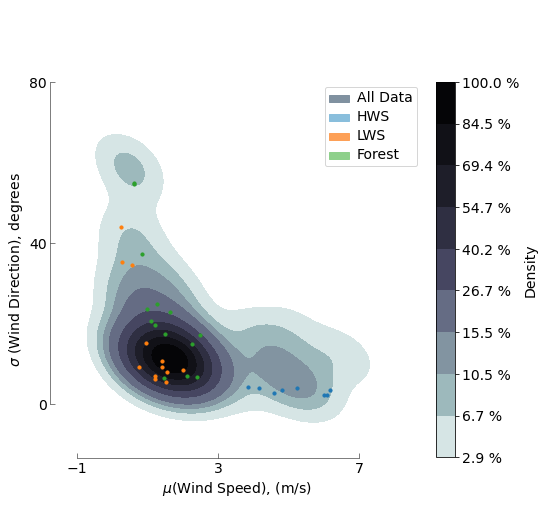

In [53]:
g = sns.JointGrid(data=alltempconcat, x='speed_avg', y='direction_std', space=0, height=7, ratio=5)

# Plot the main KDE on the JointGrid
# density = sns.kdeplot(x=np.log(alltempconcat.speed_avg), y=np.log(alltempconcat.direction_std), cmap='bone_r', ax=g.ax_joint, cbar=True,
#             cbar_kws={'ticks':[0.0008,0.03]},
#             shade=True, label='All Data',)

density = sns.kdeplot(x=alltempconcat.speed_avg, y=alltempconcat.direction_std, cmap='bone_r', ax=g.ax_joint, cbar=True,
            norm=LogNorm(),
            shade=True, label='All Data')
# sns.kdeplot(data=alltempconcat, x='speed_avg', y='direction_std', cmap='gray', alpha=0.5, levels=[0.04], shade=False, ax=g.ax_joint)

g.ax_joint.scatter((t1_1.speed_avg), (t1_1.direction_std), cmap='Blues', s=10, label='HWS')
g.ax_joint.scatter((t1_2.speed_avg), (t1_2.direction_std), cmap='Oranges', s=10, label='LWS')
g.ax_joint.scatter((t_f.speed_avg), (t_f.direction_std), cmap='g', s=10, label='Forest')

pos_joint_ax = g.ax_joint.get_position()
pos_marg_x_ax = g.ax_marg_x.get_position()
g.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
g.fig.axes[-1].set_position([.86, pos_joint_ax.y0, .07, pos_joint_ax.height])

# g.ax_joint.set_xscale('log')
# g.ax_joint.set_yscale('log')


g.ax_marg_x.axis('off')
g.ax_marg_y.axis('off')

# Adjustments
# g.ax_joint.set_xlim(-1,7)
# g.ax_joint.set_ylim(-10,90)
g.ax_joint.set_xlabel('$\mu$(Wind Speed), (m/s)')
g.ax_joint.set_ylabel('$\sigma$ (Wind Direction), degrees')


cbar = g.fig.axes[-1]
cbar.set_ylabel('Density',rotation=90)
cbar_ticks = cbar.get_yticks()
_, cbar_max = cbar.get_ylim()
cbar.set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])


mpl_functions.adjust_spines(g.ax_joint, ['left', 'bottom'],
                            spine_locations={'left': 1, 'bottom': 1}, 
                            smart_bounds=True,   
                            xticks=[-1,3,7],
                            yticks=[0,40,80],
                            linewidth=0.5)



# Custom legend patches
all_patch = mpatches.Patch(color=sns.color_palette("bone_r")[2], label='All Data')
hws_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='HWS')
lws_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='LWS')
forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest')

g.ax_joint.legend(handles=[all_patch, hws_patch, lws_patch, forest_patch])

mpl_functions.set_fontsize(g.fig, 14)


In [140]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.integrate import dblquad

# 1. Compute the KDE of your data
data_x = alltempconcat['speed_avg']
data_y = alltempconcat['direction_std']
kde = gaussian_kde(np.vstack([data_x, data_y]))

# 2. Integrate the KDE over the region enclosed by the contour of interest
level = 1

def integrand(x, y):
    value = kde(np.vstack([x, y]))
    return value if value > level else 0

# Define the bounds for integration (based on your data range or plot range)
x_min, x_max = -1, 7
y_min, y_max = -10, 90

integral_contour, _ = dblquad(integrand, x_min, x_max, lambda x: y_min, lambda x: y_max)

def kde_func(x, y):
    return kde.evaluate([[x], [y]])


integral_total, _ = dblquad(kde_func, x_min, x_max, lambda x: y_min, lambda x: y_max)
percentage = integral_contour / integral_total * 100

print(f"The contour at level {level} encloses approximately {percentage:.2f}% of the data.")




The contour at level 1 encloses approximately 0.00% of the data.


In [40]:
# print('Desert',np.mean(t1.direction_std))
# print('Forest',np.mean(t2.direction_std))

Desert 11.653955869832314
Forest 44.18842831945931


### Histogram Method

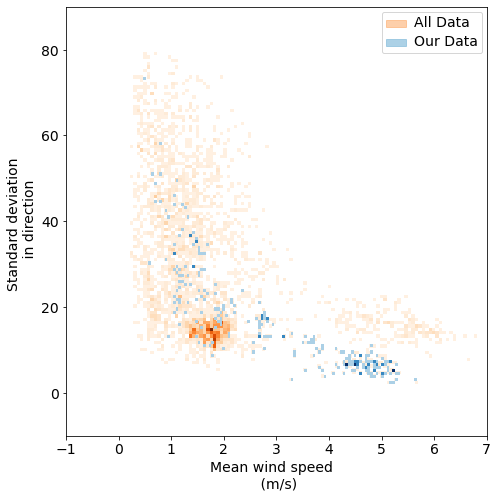

In [36]:

f, ax = plt.subplots(1, 1, figsize=(7, 7))

# Using histplot with kind='kde' to create heatmap-like visualizations
sns.histplot(data=alltempconcat, x='speed_avg', y='direction_std', cmap='Oranges', ax=ax, cbar=False, bins=100, label='All Data')
# sns.histplot(data=forestchunks, x='speed_avg', y='direction_std', cmap='Greens', ax=ax, cbar=True, label='Forest')
# sns.histplot(data=urbanchunks, x='speed_avg', y='direction_std', cmap='Purples', ax=ax, cbar=True, label='Urban')
sns.histplot(data=t1, x='speed_avg', y='direction_std', cmap='Blues', ax=ax, cbar=False, bins=100, label='Our Data')

ax.set_xlim(-1,7)
ax.set_ylim(-10,90)
ax.set_xlabel('Mean wind speed  \n (m/s)')
ax.set_ylabel('Standard deviation \n in direction')

# Custom legend patches
desert_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='All Data', alpha=0.5)
# forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest', alpha=0.5)
# urban_patch = mpatches.Patch(color=sns.color_palette("Purples")[2], label='Urban', alpha=0.7)
t1_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='Our Data', alpha=0.7)

# Add patches to the legend
# ax.legend(handles=[desert_patch, forest_patch, urban_patch, t1_patch])
ax.legend(handles=[desert_patch, t1_patch])
mpl_functions.set_fontsize(f, 14)
f.tight_layout(pad=1)

### Mean wind stat vs AIC selected stat 

In [46]:
dir='~/DataAnalysis/data/DesertWind/'
df = pd.read_hdf(dir+"20201020_172919_windy_b_data.hdf")

time = []
time.append(0)
dt=df.time_epoch.iloc[1]-df.time_epoch.iloc[0]
for j in range(1,len(df)):
    time.append(time[j-1]+dt)

df['time'] = time    


In [31]:
# df_forest = pd.read_hdf("../../Figure/methodfigure2/windgpsdata.hdf")
df_forest=pd.read_hdf('/home/gadfly/DataAnalysis/data/ForestWindData/202177_171430_windgps_data_an.hdf')
time = df_forest.time_epoch-df_forest.time_epoch[0]
df_forest['time']=time

In [52]:
query='time<=47839'
lws=df.query(query)
lws.reset_index(inplace=True)

In [53]:
query='time>=47840'
hws=df.query(query)
hws.reset_index(inplace=True)

In [61]:
df=hws.copy()
loglags=np.arange(100,6100,100) 
# lags from 0-10mins, 30 sec intervals -- excluding lag zero since there is no standard dev over a period of 0
totalrows=np.arange(0,int(len(df)/10000))
listoflists_avgd = np.empty((len(totalrows), 0)).tolist()
listoflists_avgs = np.empty((len(totalrows), 0)).tolist()
listoflists_stdd = np.empty((len(totalrows), 0)).tolist()
listoflists_stds = np.empty((len(totalrows), 0)).tolist()

for j in totalrows:
        listoflists_avgd[j], listoflists_avgs[j], listoflists_stdd[j], listoflists_stds[j] = temporal_functions.new_temporal_analysis(df.D, df.S2, lagarray=loglags, method='forward')

# Convert to df
df_avgd = pd.DataFrame(listoflists_avgd, columns=loglags)
df_avgs = pd.DataFrame(listoflists_avgs, columns=loglags)
df_stdd = pd.DataFrame(listoflists_stdd, columns=loglags)
df_stds = pd.DataFrame(listoflists_stds, columns=loglags)

test_ddf=pd.DataFrame(columns = ['speed_std', 'direction_std', 'speed_avg', 'direction_avg'])
i=0
frames = []  # list to hold individual DataFrames

for k in df_avgd.index:
    xtra = {
        'speed_std': df_stds.iloc[k,:], 
        'direction_std': df_stdd.iloc[k,:],
        'speed_avg': df_avgs.iloc[k,:], 
        'direction_avg': df_avgd.iloc[k,:],
    }
    frames.append(pd.DataFrame(xtra))

# Concatenate all the data frames in the 'frames' list
test_ddf = pd.concat(frames)

test_ddf.reset_index(inplace=True)
test_ddf.rename(columns={'index':'time'}, inplace=True)

test_ddf[['environment']]=.001 #based on environment
test_ddf[['group']]=1 #based on order of data collection
test_ddf.direction_std=test_ddf.direction_std*180/np.pi #make it degrees again
test_ddf.time=test_ddf.time*.1 #fix the time to be accurate 


In [62]:
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/LowRes/'
test_ddf.to_hdf(str(folder_path)+'hws_temporal.hdf', key='data',mode='w')

In [138]:
df_windy_temporal=pd.read_hdf(folder_path+'windy_temporal.hdf')
df_notwindy_temporal=pd.read_hdf(folder_path+'notwindy_temporal.hdf')
df_forest_temporal=pd.read_hdf(folder_path+'forest_temporal.hdf')

df_windy_temporal['turb_intensity']=df_windy_temporal['speed_std']/df_windy_temporal['speed_avg']
df_notwindy_temporal['turb_intensity']=df_notwindy_temporal['speed_std']/df_notwindy_temporal['speed_avg']
df_forest_temporal['turb_intensity']=df_forest_temporal['speed_std']/df_forest_temporal['speed_avg']

In [139]:
print('HWS',np.mean(df_windy_temporal.direction_std))
print('LWS',np.mean(df_notwindy_temporal.direction_std))
print('Forest',np.mean(df_forest_temporal.direction_std))

HWS 19.403883482508572
LWS 18.506990690073383
Forest 19.25043166134188


In [140]:
print('HWS',np.mean(df_windy_temporal.turb_intensity))
print('LWS',np.mean(df_notwindy_temporal.turb_intensity))
print('Forest',np.mean(df_forest_temporal.turb_intensity))

HWS 0.2720368859722454
LWS 0.25759813619335786
Forest 0.26713574428323617


In [144]:
print('HWS',np.mean(df_windy_temporal.speed_avg))
print('LWS',np.mean(df_notwindy_temporal.speed_avg))
print('Forest',np.mean(df_forest_temporal.speed_avg))

HWS 160.2489259429966
LWS 160.1528946829234
Forest 158.41363845923922


In [ ]:
# c=['peru', 'mediumseagreen', 'rebeccapurple', 'mediumseagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple']

# f, ax =plt.subplots(1,1, figsize=(5,5), layout='tight')

# for i in range(0,len(alltemp)):
#     ax.scatter(alltemp[i].speed_avg, np.abs(alltemp[i].direction_std),  s=4, color=c[i], alpha=.35, linewidth=None, rasterized=True)

# slope, intercept = np.polyfit(desertchunks.speed_avg, desertchunks.direction_std, 1)
# abline_values = [slope * i + intercept for i in desertchunks.speed_avg]
# ax.plot(desertchunks.speed_avg, abline_values, 'chocolate', linewidth=1)
# slope, intercept = np.polyfit(forestchunks.speed_avg, forestchunks.direction_std, 1)
# abline_values = [slope * i + intercept for i in forestchunks.speed_avg]
# ax.plot(forestchunks.speed_avg, abline_values, 'forestgreen', linewidth=1)  


# ax.set_xlabel('Mean wind speed  \n (m/s)')
# ax.set_ylabel('Standard deviation \n in direction')
# fifi.mpl_functions.set_fontsize(f, 14)

In [ ]:
# f, ax = plt.subplots(1, 1, figsize=(7, 7))
# sns.kdeplot(data=desertchunks, x='speed_avg', y='direction_std', cmap='Oranges', shade=True, ax=ax, alpha=0.8, thresh=0.05, label='Desert')
# sns.kdeplot(data=forestchunks, x='speed_avg', y='direction_std', cmap='Greens', shade=True, ax=ax, alpha=1, label='Forest')
# sns.kdeplot(data=urbanchunks, x='speed_avg', y='direction_std', cmap='Purples', shade=True, ax=ax, alpha=0.7, thresh=0.05, label='Urban')  # Assuming 't1' is another dataset
# sns.kdeplot(data=t1, x='speed_avg', y='direction_std', cmap='Blues', shade=True, ax=ax, alpha=0.7, thresh=0.05, label='Our Data')  # Assuming 't1' is another dataset
# ax.set_xlim(-1,7)
# ax.set_ylim(-10,80)
# ax.set_xlabel('Mean wind speed  \n (m/s)')
# ax.set_ylabel('Standard deviation \n in direction')

# # mpl_functions.adjust_spines(ax,['left','bottom'],
# #                             spine_locations={'left': 1,'bottom': 1}, 
# #                             smart_bounds=True,   
# #                             xticks=[0,7],
# #                             yticks=[0,80],
# #                             linewidth=0.5)


# # Custom legend patches
# desert_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='Desert', alpha=0.5)
# forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest', alpha=0.5)
# urban_patch = mpatches.Patch(color=sns.color_palette("Purples")[2], label='Urban', alpha=0.7)
# t1_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='Our Data', alpha=0.7)

# # Add patches to the legend
# ax.legend(handles=[desert_patch, forest_patch, urban_patch,t1_patch])


# mpl_functions.set_fontsize(f, 14)
# # f.savefig('../../Figure/LagAll.jpeg', dpi=300, bbox_inches = "tight")